<a href="https://colab.research.google.com/github/Tbharvesh/DeepLearning/blob/main/NIFTY_50_Stock_Market_Data_(2000_2021)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt


from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
main_dataset = pd.read_csv("HCLTECH.csv")

In [5]:
main_dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [30]:
main_dataset.shape

(5300, 6)

In [6]:
# avg='clos'
main_dataset=main_dataset[['Date','Close','Open','VWAP']]


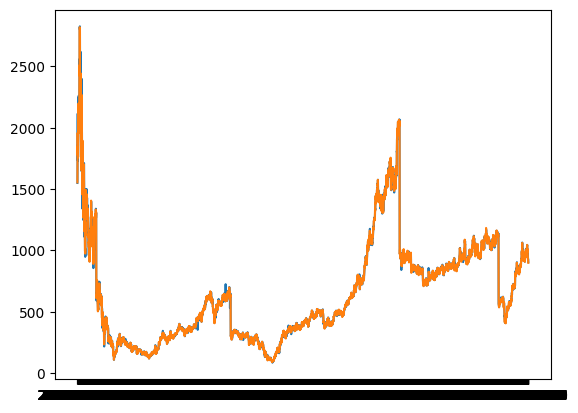

In [7]:
plt.plot(main_dataset.Date,main_dataset.Open)
plt.plot(main_dataset.Date,main_dataset.Close)


In [8]:
main_dataset['average'] = main_dataset[['Open','Close']].mean(axis=1)

In [9]:
main_dataset['Diff']=main_dataset['VWAP']-main_dataset['average']
main_dataset


,Date,Close,Open,VWAP,average,Diff
0,2000-01-11,1554.45,1550.0,1582.72,1552.225,30.495
1,2000-01-12,1678.85,1560.0,1657.05,1619.425,37.625
2,2000-01-13,1813.20,1790.0,1804.69,1801.600,3.090
3,2000-01-14,1958.30,1958.3,1939.90,1958.300,-18.400
4,2000-01-17,1801.65,2115.0,1990.55,1958.325,32.225
...,...,...,...,...,...,...
5295,2021-04-26,928.80,940.0,931.70,934.400,-2.700
5296,2021-04-27,928.85,931.0,928.06,929.925,-1.865
5297,2021-04-28,923.80,931.2,926.63,927.500,-0.870
5298,2021-04-29,909.55,929.7,914.34,919.625,-5.285


In [13]:
np.min(main_dataset['Diff'])

-94.92999999999984

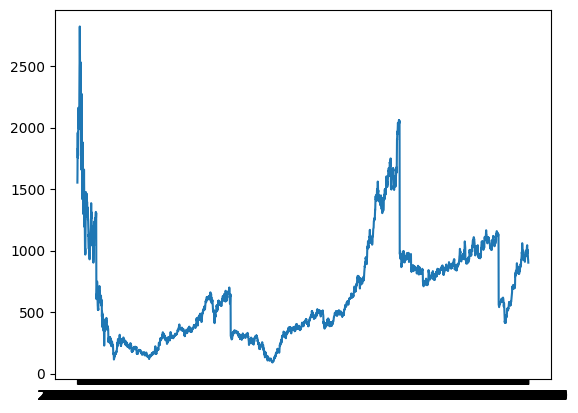

In [10]:
plt.plot(main_dataset.Date,main_dataset.average)
plt.show()

In [22]:
dataset=main_dataset[['Date','VWAP']]
target=main_dataset.VWAP
dataset=dataset.set_index('Date')

In [23]:
# dataset=dataset.to_frame() #Convert the Series into a dataframe object
dataset['MovingAvg']=dataset.expanding(min_periods=3).mean()
dataset['EMA'] = dataset.iloc[:,0].ewm(span=3,adjust=False).mean() #ewm is used exponential moving average

RNNs have an issue of short-term memory ,they tend to retain info of only the later ones.to remove this problem ,we use GRU.

GRU helps in keeping only the imp. info in the whole sequence

1. GRU Layer

2. output Layer

3. GRU Layer

4. Output Layer


In [24]:
dataset = dataset[dataset['MovingAvg'].notna()] #Remove the rows that have NAs
dataset.head()

,VWAP,MovingAvg,EMA
Date,,,
2000-01-13,1804.69,1681.486667,1712.287500
2000-01-14,1939.90,1746.090000,1826.093750
2000-01-17,1990.55,1794.982000,1908.321875
2000-01-18,1716.39,1781.883333,1812.355937
2000-01-19,1842.81,1790.587143,1827.582969


In [26]:
x,y=dataset.values,target.values

In [27]:
x_scaled_set = MinMaxScaler() #Use MinMaxScaler function from sklearn.preprocessing library
y_scaled_set = MinMaxScaler()

X = x_scaled_set.fit_transform(x) #Fit to data and transform the data array x
Y = y_scaled_set.fit_transform(y.reshape(-1,1)) #Fit to data and transform the data array y. Reshape the y variable to long format

In [31]:
X_train_data=X[0:4700,]
y_train_data=Y[0:4700,]
X_test_data=X[4700:5300,]
y_test_data=Y[4700:5300,]

In [32]:
X_train_data = X_train_data.reshape((-1,1,2)) #we are processing one row two cols at a time
X_test_data = X_test_data.reshape((-1,1,2))